### Preprocessing

In [1]:
import pandas as pd

In [12]:
df = pd.read_table('pdbbind/data/index/INDEX_general_PL_data.2020',skiprows=4,sep=r'\s+',usecols=[0,4]).drop(0)
df = df.rename(columns={'#': 'name','release': 'affinity'})
df_refined = pd.read_table('pdbbind/data/index/INDEX_refined_data.2020',skiprows=4,sep=r'\s+',usecols=[0,4]).drop(0)
df_refined = df_refined.rename(columns={'#': 'name','release': 'affinity'})
df = pd.concat([df,df_refined])

In [13]:
quantities = ['ki','kd','ka','k1/2','kb','ic50','ec50']

In [14]:
from pint import UnitRegistry
ureg = UnitRegistry()

def to_uM(affinity):
    val = ureg(affinity)
    try:
        return val.m_as(ureg.uM)
    except Exception:
        pass
    
    try:
        return 1/val.m_as(1/ureg.uM)
    except Exception:
        pass

In [15]:
df['affinity_uM'] = df['affinity'].str.split('[=\~><]').str[1].apply(to_uM)
df['affinity_quantity'] = df['affinity'].str.split('[=\~><]').str[0]

<AxesSubplot:>

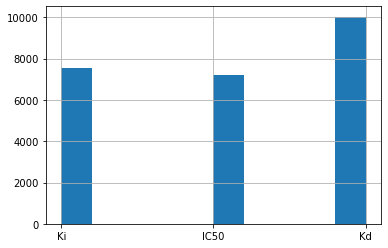

In [16]:
df['affinity_quantity'].hist()

In [17]:
df_filter = df[df['affinity_quantity'].str.lower().isin(quantities)]

In [18]:
df_complex = pd.read_parquet('data/pdbbind_complex.parquet')

In [20]:
df_all = df_complex.merge(df_filter,on='name').drop('affinity',axis=1)

In [21]:
df_all

name                                                seq  \
0      2lbv  MTVPDRSEIAGKWYVVALASNTEFFLREKDKMKMAMARISFLGEDE...   
1      1lt6  APQTITELCSEYRNTQIYTINDKILSYTESMAGKREMVIITFKSGE...   
2      4lwi  VETFAFQAEIAQLMSLIINTFYSNKEIFLRELISNSSDALDKIRYE...   
3      3t4p  AAPFDKSKNVAQSIDQLIGQTPALYLNKLNNTKAKVVLKMECENPM...   
4      6oyz  YITFRSFTAVLIAFFLTLVLSPSFINRLRKIQRKKYTPTMGGIVIL...   
...     ...                                                ...   
24754  4j46  GTIYPRNPAMYSEEARLKSFQNWPDYAHLTPRELASAGLYYTGIGD...   
24755  2c80  DHIKVIYFNGRGRAESIRMTLVAAGVNYEDERISFQDWPKIKPTIP...   
24756  2c80  DHIKVIYFNGRGRAESIRMTLVAAGVNYEDERISFQDWPKIKPTIP...   
24757  5wl0  NDDIDQSLIIAARNIVRRASVSADPLASLLEMCHSTQIGGTRMVDI...   
24758  5wl0  NDDIDQSLIIAARNIVRRASVSADPLASLLEMCHSTQIGGTRMVDI...   

                                                  smiles  affinity_uM  \
0                              CCCCCCCCCCCCCCCCCCCC(=O)O      0.02600   
1      OC[C@H]1O[C@H](Oc2cccc(c2)N(=O)=O)[C@@H]([C@H]...    500.00000   
2      COc1ccc(cc1)c1c(onc1c1cc(C(C)C)c(cc1O)O)NC(=O)...      0.02300   
3      OC[C@@H](C(=O)N[C@@H]([C@H](CC)C)C(=O)O)NC(=O)...      6.43000   
4      CO[C@@H]1[C@H](O[C@H]([C@@H]1O)n1ccc(=O)[nH]c1...      0.18500   
...                                                  ...          ...   
24754  CC[C@@H]([C@@H](C(=O)O)NC(=O)[C@@H]1CCCN1C(=O)...      5.24000   
24755  CCCCCCSC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(...      4.70000   
24756  CCCCCCSC[C@@H](C(=O)NCC(=O)O)NC(=O)CC[C@@H](C(...      4.70000   
24757  OC(=O)[C@H]1[C@@H]2CC[C@H]([C@@H]1Nc1nc(ncc1F)...      0.00067   
24758  OC(=O)[C@H]1[C@@H]2CC[C@H]([C@@H]1Nc1nc(ncc1F)...      0.00067   

      affinity_quantity  
0                    Kd  
1                  IC50  
2                  IC50  
3                    Kd  
4                  IC50  
...                 ...  
24754                Ki  
24755                Kd  
24756                Kd  
24757                Kd  
24758                Kd  

[24759 rows x 5 columns]

In [53]:
df_all.to_parquet('data/pdbbind.parquet')

In [54]:
len(df_all)

24759